# <span style = "color: green" >Simple Linear Regression Project (Gold Price Prediction) </span>

***

Of all the precious metals, gold is the most popular as an investment. Investors generally buy gold as a way of diversifying risk, especially through the use of futures contracts and derivatives. The gold market is subject to speculation and volatility as are other markets. Compared to other precious metals used for investment, gold has been the most effective safe haven across a number of countries.<br><br>
The Dataset contain gold prices (in USD) from 2001 to 2019.
Our goal is to predict where the gold prices will be in the coming years

#### Import the necessary libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read 'gold_price_usd.csv' & store it in a variable

In [45]:
df = pd.read_csv('gold_price_usd.csv')

#### View the first 5 rows

In [46]:
df.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check the information

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

In [48]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

In [49]:
df['Date'] = pd.to_datetime(df['Date'])

#### Rename USD (AM) to Price

In [50]:
df['Year'] = df['Date'].dt.year
df['Months'] = df['Date'].dt.month
df.rename(columns={'USD (AM)':'Price'},inplace=True)
df.head()

,Date,Price,Year,Months
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### Check if there are any missing values in the dataset

In [51]:
df.isna().sum()

Date      0
Price     0
Year      0
Months    0
dtype: int64

#### Gather the basic statistical information about the dataset

In [52]:
df.describe()

,Price,Year,Months
count,4718.000000,4718.000000,4718.000000
mean,959.990812,2009.839339,6.456761
std,449.456217,5.392467,3.426217
min,256.700000,2001.000000,1.000000
25%,449.112500,2005.000000,3.000000
50%,1113.125000,2010.000000,6.000000
75%,1293.750000,2014.750000,9.000000
max,1896.500000,2019.000000,12.000000


#### Convert Date column from object to datetime format

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4718 non-null   datetime64[ns]
 1   Price   4718 non-null   float64       
 2   Year    4718 non-null   int64         
 3   Months  4718 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 147.6 KB


#### See all the years and Months in our dataset

In [54]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [55]:
#Years

In [56]:
df['Months'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

## <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

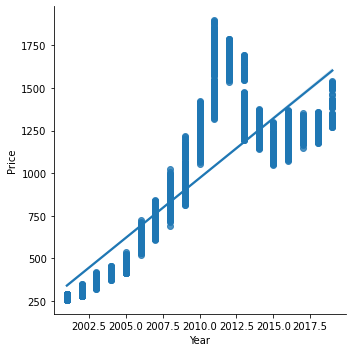

In [57]:
sns.lmplot(x='Year',y='Price',data=df)

### Plot a histplot to find the variation in price

<AxesSubplot:xlabel='Price', ylabel='Count'>

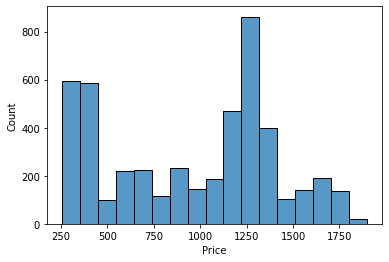

In [58]:
sns.histplot(x='Price',data=df)

### Assign year and price in x and y variables

In [59]:
x = df[['Year']]
y = df['Price']

In [60]:
# X = df[['Year']]
# y = df['Price']

### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [61]:
# from sklearn.model_selection import train_test_split

In [62]:
# import train_test split
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [64]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=100)

## Train Data

In [65]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [66]:
x_train.shape

(3302, 1)

In [67]:
y_train.shape

(3302,)

### Create Linear Regression Model

In [68]:
model = LinearRegression()

### Train the  model

In [69]:
model.fit(x_train,y_train)

LinearRegression()

### Check the score of our model

In [70]:
model.score(x_train,y_train)

0.7048691960223041

### Check the coefficient and Intercept

In [71]:
#print the intercept
model.coef_

array([70.17366927])

In [72]:
model.intercept_

-140074.32374779374

In [73]:
#print the coefficent


### Make Prediction with Test data

In [74]:
# Also store the predicted values in a variable
y_pred = model.predict(x_test)
y_pred

array([ 553.70946788,  413.36212934, 1185.27249131, ..., 1115.09882204,
        343.18846007, 1536.14083765])

In [75]:
y_test

962      425.50
403      307.80
3220    1335.75
1588     687.25
2065     924.75
         ...   
2237    1088.00
3262    1250.75
2817    1776.50
252      276.50
4441    1222.05
Name: Price, Length: 1416, dtype: float64

### Create a new dataframe with actual and predicted values with year(X_test) as index

In [78]:
y_pred

array([ 553.70946788,  413.36212934, 1185.27249131, ..., 1115.09882204,
        343.18846007, 1536.14083765])

In [79]:
y_test.values

array([ 425.5 ,  307.8 , 1335.75, ..., 1776.5 ,  276.5 , 1222.05])

In [85]:
pd.DataFrame(zip(y_test.values,y_pred),columns=['Actual','Predictions'])


,Actual,Predictions
0,425.50,553.709468
1,307.80,413.362129
2,1335.75,1185.272491
3,687.25,764.230476
4,924.75,904.577814
...,...,...
1411,1088.00,904.577814
1412,1250.75,1185.272491
1413,1776.50,1115.098822
1414,276.50,343.188460


### Check the mean absolute error, mean square error

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [87]:
# Mean absolute error
mean_absolute_error(y_test,y_pred)

186.2427389387367

In [88]:
# Mean squared error
mean_squared_error(y_test,y_pred)

58032.97376893121

### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

In [112]:
x_test.reset_index(inplace=True)

In [113]:

x_test.drop(columns=['index'],inplace=True)

/home/susan/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [114]:
x_test

,Year
0,2004
1,2002
2,2013
3,2007
4,2009
...,...
1411,2009
1412,2013
1413,2012
1414,2001


In [120]:
xtest = [2025,2026,2027,2030]
xtest = pd.DataFrame(xtest,columns=['Year'])
xtest

,Year
0,2025
1,2026
2,2027
3,2030


In [142]:
s = model.predict(xtest)
q=pd.DataFrame(s,columns=['Price'])
q['Year'] = xtest

In [146]:
q.set_index('Year',inplace=True)
q

,Price
Year,
2025,2027.356523
2026,2097.530192
2027,2167.703861
2030,2378.224869


***